In [378]:
from __future__ import print_function
__author__= 'vys'

#from scipy.optimize import curve_fit
from scipy.stats import norm as nor
import pylab as pl
import numpy as np    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


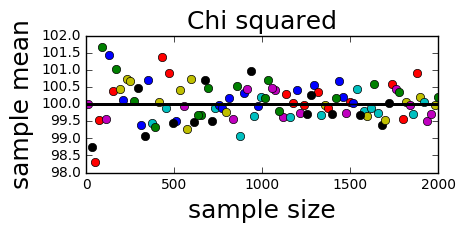

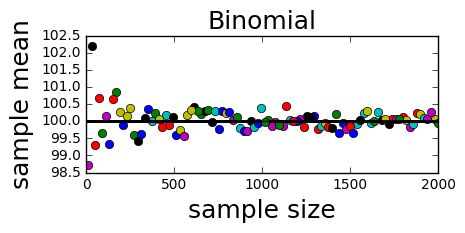

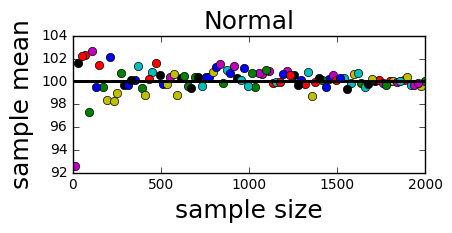

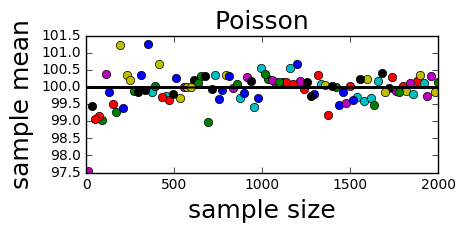

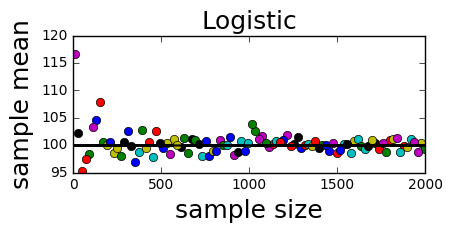

In [373]:
np.random.seed(100)

#Generate 100 samples of different sizes N (N>10 & N<2000)
mysize = np.linspace(11,1999,100).astype(int)
mymean = 100
ns = 200
p = 0.5
df = mymean

md ={}
md['chisq'] = {}
md['binomial'] = {}
md['normal'] = {}
md['poisson'] = {}
md['logistic'] ={}

for n in mysize:
    #Chisquare Distribution
    md['chisq'][n] = np.random.chisquare(df, size = n)
    #Binomial Distribution
    md['binomial'][n] = np.random.binomial(ns,p, size= n)
    #Normal Distribution
    md['normal'][n] = np.random.normal(mymean,20, size = n)
    #Poisson Distribution
    md['poisson'][n] = np.random.poisson(mymean, size = n)
    #Logistic Distribution
    md['logistic'][n] = np.random.logistic(mymean, 20, size= n) 

md['chisq']['means'] = {}
md['binomial']['means'] = {}
md['normal']['means'] = {}
md['poisson']['means'] ={}
md['logistic']['means'] ={}

axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(321)
axbinomial = pl.figure(figsize=(10,6)).add_subplot(322)
axnormal = pl.figure(figsize=(10,6)).add_subplot(323)
axpoisson = pl.figure(figsize=(10,6)).add_subplot(324)
axlogistic = pl.figure(figsize=(10,6)).add_subplot(325)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axbinomial.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial.set_xlabel('sample size', fontsize=18)
        axbinomial.set_ylabel('sample mean', fontsize=18)
        axbinomial.set_title('Binomial', fontsize=18)
        axbinomial.plot([min(mysize), max(mysize)], [mymean,mymean], 'k')

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        axnormal.plot(nn, md['normal']['means'][nn], 'o')
        axnormal.set_xlabel('sample size', fontsize=18)
        axnormal.set_ylabel('sample mean', fontsize=18)
        axnormal.set_title('Normal', fontsize=18)
        axnormal.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        axpoisson.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson.set_xlabel('sample size', fontsize=18)
        axpoisson.set_ylabel('sample mean', fontsize=18)
        axpoisson.set_title('Poisson', fontsize=18)
        axpoisson.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
        
for nn in md['logistic']:
    if not type(nn) == str:
        md['logistic']['means'][nn] = md['logistic'][nn].mean()
        axlogistic.plot(nn, md['logistic']['means'][nn], 'o')
        axlogistic.set_xlabel('sample size', fontsize=18)
        axlogistic.set_ylabel('sample mean', fontsize=18)
        axlogistic.set_title('Logistic', fontsize=18)
        axlogistic.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

## Figure 1: Plots of sample mean (dependent var.) against the sample size N (independent var.) As the sample size is increasing the sample mean is getting closer to the mean of the population which we have set as 100

In [375]:
a =[]
for keys in md:
    a.extend(md[keys]['means'].values())

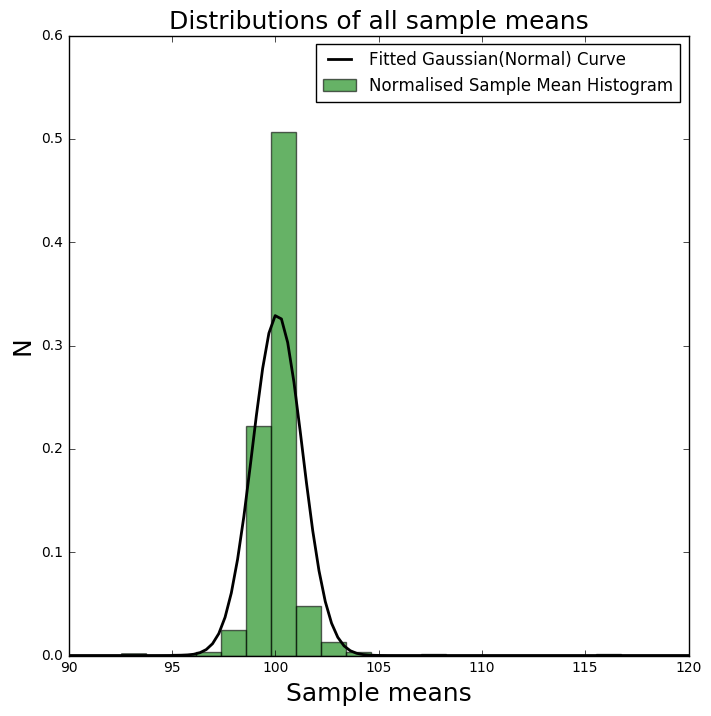

In [384]:
pl.figure(figsize=(8,8))

# Fit a normal distribution to the data:
mu, std = nor.fit(a)

# Plot the histogram.
pl.hist(a, bins=20, normed = True, alpha=0.6, color='g', label = 'Normalised Sample Mean Histogram')

# Plot the PDF.
xmin, xmax = pl.xlim()
x = np.linspace(xmin, xmax, 100)
p = nor.pdf(x, mu, std)
pl.plot(x, p, 'k', linewidth=2, label = 'Fitted Gaussian(Normal) Curve')

pl.xlabel('Sample means', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distributions of all sample means', fontsize = 18)
pl.legend()
pl.show()


## Figure 2: Plot of distribution of all means

The sample means from different distributions(poisson, normal, chisquare, logistic, binomial) have been plotted above. The resulting distribution is almost similar to the normal distribution as we have taken a large number of samples. This proves the 'Central Limit Theorem': 

The distribution of the means of N samples generated from the same parent distribution will

I. be normally distributed (i.e. will be a gaussian) 

II. have mean equal to the mean of the parent distribution - Eg. Mean of the sample means of chisquare distribution is 100

III. have standard deviation equal to the parent population standard deviation divided by the square root of the sample size 